<a href="https://colab.research.google.com/github/MohitKumarKS/python_project/blob/main/agents%26PST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

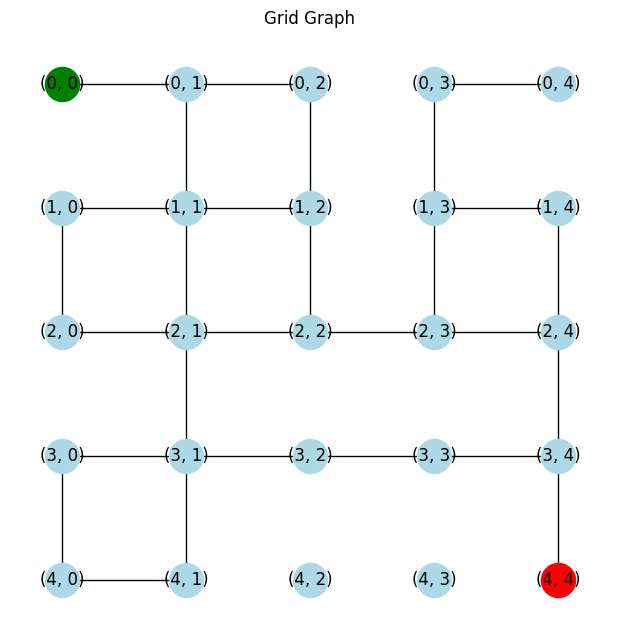

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

row,cols=5,5
G=nx.grid_2d_graph(row,cols)
for(u,v)in G.edges:
  G.edges[u,v]['weight']=1
edges_to_remove=random.sample(list(G.edges()),int(0.3 * G.number_of_edges()))
G.remove_edges_from(edges_to_remove)

start=(0,0)
goal=(row-1,cols-1)
pos={(x,y):(y,-x) for x,y in G.nodes()}

plt.figure(figsize=(6,6))
nx.draw(G,pos,node_color='lightblue',with_labels=True,node_size=600,edge_color='black')
nx.draw_networkx_nodes(G,pos,nodelist=[start],node_color='green',node_size=600)
nx.draw_networkx_nodes(G,pos,nodelist=[goal],node_color='red',node_size=600)
plt.title("Grid Graph")
plt.axis("off")
plt.show()

In [ ]:
from collections import deque
def bfs(graph,start,goal):
  visited=set()
  queue =deque([[start]])
  while queue:
    path=queue.popleft()
    node=path[-1]
    if node ==goal:
      return path

    if node not in visited:
      for neighbor in graph[node]:
        new_path=list(path)
        new_path.append(neighbor)
        queue.append(new_path)
      visited.add(node)
  return None
print("",bfs(G,start,goal))

 [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (4, 4)]


A* Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


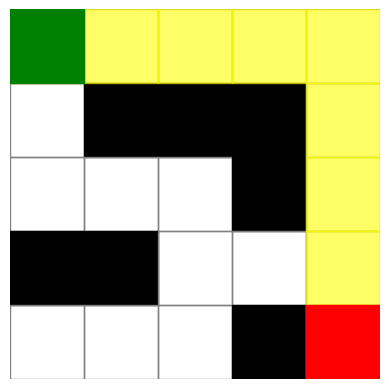

In [9]:
import heapq
import matplotlib.pyplot as plt

# Heuristic: Manhattan distance
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    heap = [(heuristic(start, goal), 0, start, [start])]
    visited = set()

    while heap:
        est_total, cost, current, path = heapq.heappop(heap)

        if current == goal:
            return path

        if current in visited:
            continue
        visited.add(current)

        # Explore neighbors: up, down, left, right
        for dr, dc in [(0,1), (0,-1), (1,0), (-1,0)]:
            nr, nc = current[0] + dr, current[1] + dc

            if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] == 0:
                if (nr, nc) not in visited:
                    new_cost = cost + 1  # step cost
                    est = new_cost + heuristic((nr, nc), goal)
                    heapq.heappush(heap, (est, new_cost, (nr, nc), path + [(nr, nc)]))
    return None

# Create a box-shaped 5x5 grid (0 = free, 1 = wall)
grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

start = (0, 0)  # top-left
goal = (4, 4)   # bottom-right

path = a_star(grid, start, goal)
print("A* Path:", path)

# Visualization
fig, ax = plt.subplots()
for r in range(len(grid)):
    for c in range(len(grid[0])):
        if grid[r][c] == 1:
            ax.add_patch(plt.Rectangle((c, len(grid)-1-r), 1, 1, color="black"))
        else:
            ax.add_patch(plt.Rectangle((c, len(grid)-1-r), 1, 1, fill=False, edgecolor="gray"))

# Draw path
if path:
    for (r, c) in path:
        ax.add_patch(plt.Rectangle((c, len(grid)-1-r), 1, 1, color="yellow", alpha=0.6))

# Draw start & goal
ax.add_patch(plt.Rectangle((start[1], len(grid)-1-start[0]), 1, 1, color="green"))
ax.add_patch(plt.Rectangle((goal[1], len(grid)-1-goal[0]), 1, 1, color="red"))

plt.xlim(0, len(grid[0]))
plt.ylim(0, len(grid))
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()